# TASK NO. 1 - TITANIC SURVIVAL PREDICTION
### CODSOFT INTERNSHIP DATA SCIENCE OCTOBER 2023
### Name : Bhushan Sonawane

#### Importing necessary libraries for the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:/Users/dell/Desktop/tested.csv')

#### Exploring data

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,35.0,0,0,330911,7.83,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.00,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.69,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.66,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.29,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
columns = ['Age', 'Fare']

for col in columns:
    data[col].fillna(data[col].median, inplace=True)
    
data['Cabin'].fillna('Unknown', inplace=True)

In [7]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
data['Title'] = data['Name'].str.extract(r',\s(.*?)\.')

data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Dona', 'Mrs')
data['Title'] = data['Title'].replace(['Col', 'Rev', 'Dr'], 'Rare')

In [11]:
data['Family'] = data['SibSp'] + data['Parch']
data.drop(['PassengerId', 'Name'], axis = 1, inplace = True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,0,3,male,35.0,0,0,330911,7.83,Unknown,Q,Mr,0
1,1,3,female,47.0,1,0,363272,7.0,Unknown,S,Mrs,1
2,0,2,male,62.0,0,0,240276,9.69,Unknown,Q,Mr,0
3,0,3,male,27.0,0,0,315154,8.66,Unknown,S,Mr,0
4,1,3,female,22.0,1,1,3101298,12.29,Unknown,S,Mrs,2


In [12]:
data.describe()

,Survived,Pclass,SibSp,Parch,Family
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,0.447368,0.392344,0.839713
std,0.481622,0.841838,0.896760,0.981429,1.519072
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,8.000000,9.000000,10.000000


In [13]:
data.corr()

,Survived,Pclass,SibSp,Parch,Family
Survived,1.000000,-0.108615,0.099943,0.159120,0.161803
Pclass,-0.108615,1.000000,0.001087,0.018721,0.012736
SibSp,0.099943,0.001087,1.000000,0.306895,0.788610
Parch,0.159120,0.018721,0.306895,1.000000,0.827242
Family,0.161803,0.012736,0.788610,0.827242,1.000000


<AxesSubplot:>

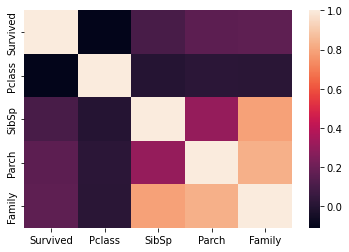

In [14]:
sns.heatmap(data.corr())

In [15]:
data.Survived.value_counts()

0    266
1    152
Name: Survived, dtype: int64

#### Data Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

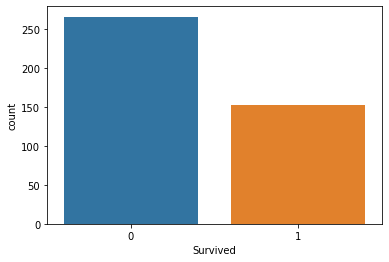

In [16]:
sns.countplot(data['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

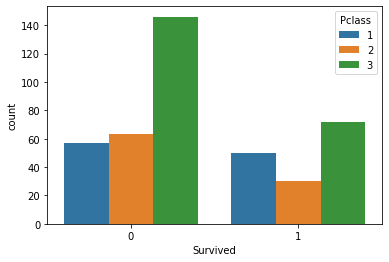

In [17]:
sns.countplot(data['Survived'], hue=data["Pclass"])

<AxesSubplot:xlabel='Sex', ylabel='count'>

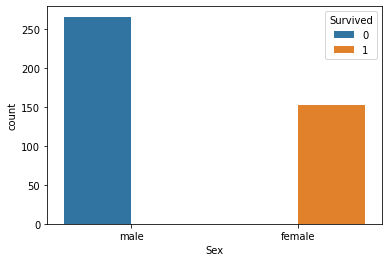

In [18]:
sns.countplot(data['Sex'], hue=data["Survived"])

#### Feature Engineering

In [19]:
print(pd.pivot_table(data, index='Survived', columns='Pclass', values='Ticket', aggfunc='count'))
print(pd.pivot_table(data, index='Survived', columns='Sex', values='Ticket', aggfunc='count'))
print(pd.pivot_table(data, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'))

Pclass     1   2    3
Survived             
0         57  63  146
1         50  30   72
Sex       female   male
Survived               
0            NaN  266.0
1          152.0    NaN
Embarked   C   Q    S
Survived             
0         62  22  182
1         40  24   88


In [20]:
data['cabin_multiple'] = data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
data['cabin_adv'] = data.Cabin.apply(lambda x: str(x)[0])
print(data['cabin_adv'].value_counts())

U    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: cabin_adv, dtype: int64


In [21]:
data['numeric_ticket'] = data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
data['ticket_letters'] = data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.', '').replace('/', '').lower() 
                                       if len(x.split(' ')[:-1]) > 0 else 0)

#### Predicting the survived with machine learning models

In [22]:
#Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [23]:
data.Pclass = data.Pclass.astype(str)

In [24]:
#Training and testing data
labelencoder = LabelEncoder()
data['Sex'] = labelencoder.fit_transform(data['Sex'])
X = data[['Sex','Pclass']]
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
#Logistic regression model
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [26]:
cv = cross_val_score(lr, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[1. 1. 1. 1. 1.]
1.0


In [27]:
#Gaussian Naive Bayes model
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[1. 1. 1. 1. 1.]
1.0


In [28]:
#Decision Tree Model
dt = tree.DecisionTreeClassifier(random_state=1)
cv = cross_val_score(dt, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[1. 1. 1. 1. 1.]
1.0


In [29]:
#K-Neighbors model
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[1. 1. 1. 1. 1.]
1.0


In [30]:
#Random Forest Model
rf = RandomForestClassifier(random_state=1)
cv = cross_val_score(rf, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[1. 1. 1. 1. 1.]
1.0


In [31]:
#Support Vector Machine Model
svc = SVC(probability=True)
cv = cross_val_score(svc, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[1. 1. 1. 1. 1.]
1.0


In [32]:
#Model Prediction
pred = print(lr.predict(X_test))

[0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0]


In [33]:
print(y_test)

321    0
324    1
388    0
56     0
153    1
      ..
371    1
399    0
272    1
400    1
380    0
Name: Survived, Length: 138, dtype: int64
